<a href="https://colab.research.google.com/github/skflwright/Python_Projects_Data_201/blob/main/Hand_Written_Digits_HW_KW_12_9_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import load_model
from keras.utils.vis_utils import plot_model

from google.colab.patches import cv2_imshow

In [ ]:
# loads the MNIST dataset
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

In [ ]:
# Training Parameters
batch_size = 128
epochs = 5

In [ ]:
# Lets store the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]

In [ ]:
# Getting our date in the right 'shape' needed for Keras
# We need to add a 4th dimenion to our data thereby changing our
# Our original image shape of (60000,28,28) to (60000,28,28,1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

In [ ]:
# store the shape of a single image 
input_shape = (img_rows, img_cols, 1)

In [ ]:
# change our image type to float32 data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255
x_test /= 255

In [ ]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
# Now we one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [ ]:
# Let's count the number columns in our hot encoded matrix 
print ("Number of Classes: " + str(y_test.shape[1]))

Number of Classes: 10


In [ ]:
num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

In [ ]:
# create model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5)) #tried .75 but that only brought me up to 98.3
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.Adamax(), metrics = ['accuracy']) #Increasing epochs from 5 to 20 using Adadelta got .88 accuracy
# switching activation function to Adagrad using 20 5 epochs brought it to .92 accuracy (.94 with 20 ephochs.) Using Adamax at 5 epochs reached 98.6% accuracy.


In [ ]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 9216)              0         
                                                                 
 dense_7 (Dense)             (None, 128)               1179776   
                                                      

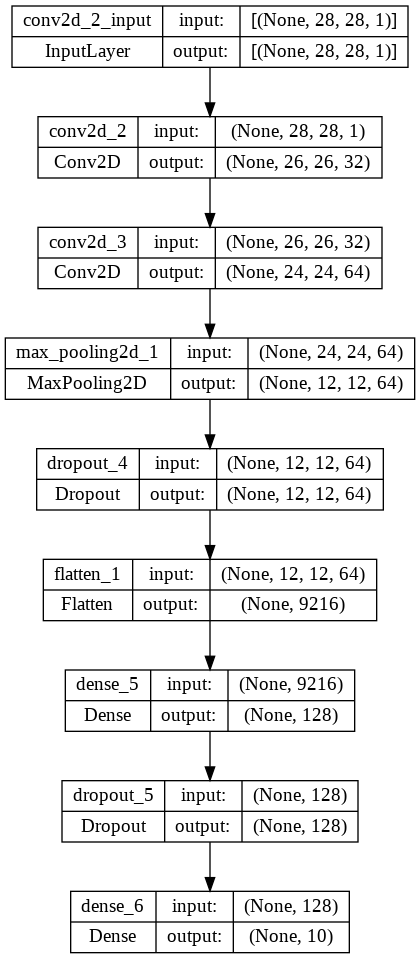

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.3481 - accuracy: 0.8948 - val_loss: 0.0931 - val_accuracy: 0.9709
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1332 - accuracy: 0.9613 - val_loss: 0.0593 - val_accuracy: 0.9806
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0960 - accuracy: 0.9715 - val_loss: 0.0466 - val_accuracy: 0.9847
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0786 - accuracy: 0.9770 - val_loss: 0.0439 - val_accuracy: 0.9857
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0695 - accuracy: 0.9793 - val_loss: 0.0371 - val_accuracy: 0.9867


In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)

In [ ]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.037056002765893936
Test accuracy: 0.9866999983787537


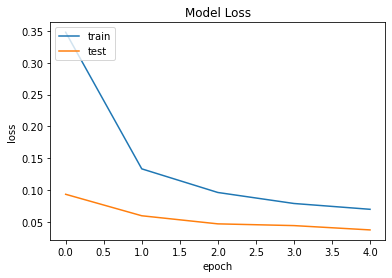

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

In [ ]:
model_2 = Sequential()

model_2.add(Dense(64, activation='tanh',input_shape=(11,)))
model_2.add(Dropout(0.25))
model_2.add(Dense(32,activation='tanh'))
model_2.add(Dropout(0.5))
model_2.add(Dense(1, activation='sigmoid'))

In [ ]:
model_2.compile(loss ='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                768       
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dropout_13 (Dropout)        (None, 32)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.save('hw_digits.h5')

In [ ]:
def x_cord_contour(contour):
    # This function take a contour from findContours
    # it then outputs the x centroid coordinates
    M = cv2.moments(contour)
    return (int(M['m10']/M['m00'])) 

In [ ]:
def makeSquare(not_square):
    # This function takes an image and makes the dimenions square
    # It adds black pixels as the padding where needed

    BLACK = [0,0,0]
    img_dim = not_square.shape
    height = img_dim[0]
    width = img_dim[1]
    #print("Height = ", height, "Width = ", width)
    if (height == width):
        square = not_square
        return square
    else:
        doublesize = cv2.resize(not_square,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)
        height = height * 2
        width = width * 2
        #print("New Height = ", height, "New Width = ", width)
        if (height > width):
            pad = int((height - width)/2)
            #print("Padding = ", pad)
            doublesize_square = cv2.copyMakeBorder(doublesize,0,0,pad,pad,cv2.BORDER_CONSTANT,value=BLACK)
        else:
            pad = (width - height)/2
            #print("Padding = ", pad)
            doublesize_square = cv2.copyMakeBorder(doublesize,pad,pad,0,0,\
                                                   cv2.BORDER_CONSTANT,value=BLACK)
    doublesize_square_dim = doublesize_square.shape
    #print("Sq Height = ", doublesize_square_dim[0], "Sq Width = ", doublesize_square_dim[1])
    return doublesize_square

In [ ]:
def resize_to_pixel(dimensions, image):
    # This function then re-sizes an image to the specificied dimenions

    buffer_pix = 4
    dimensions  = dimensions - buffer_pix
    squared = image
    r = float(dimensions) / squared.shape[1]
    dim = (dimensions, int(squared.shape[0] * r))
    resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    img_dim2 = resized.shape
    height_r = img_dim2[0]
    width_r = img_dim2[1]
    BLACK = [0,0,0]
    if (height_r > width_r):
        resized = cv2.copyMakeBorder(resized,0,0,0,1,cv2.BORDER_CONSTANT,value=BLACK)
    if (height_r < width_r):
        resized = cv2.copyMakeBorder(resized,1,0,0,0,cv2.BORDER_CONSTANT,value=BLACK)
    p = 2
    ReSizedImg = cv2.copyMakeBorder(resized,p,p,p,p,cv2.BORDER_CONSTANT,value=BLACK)
    img_dim = ReSizedImg.shape
    height = img_dim[0]
    width = img_dim[1]
    #print("Padded Height = ", height, "Width = ", width)
    return ReSizedImg

In [ ]:
classifier = load_model('hw_digits.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


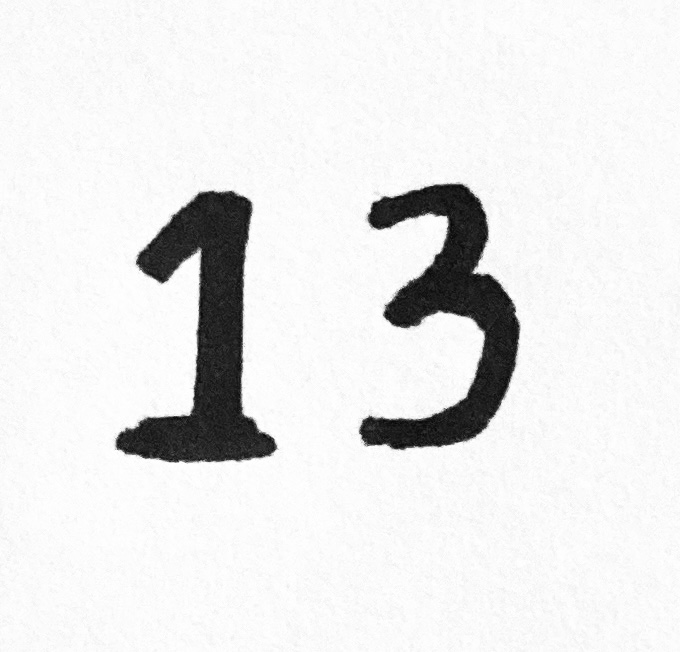

-1

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Data Science/Fall Predictive Analytics.zip (Unzipped Files)/Week 6 - Intro to Deep Learning/Lucky.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2_imshow(image)
cv2.waitKey(0)

In [ ]:
# Blur image then find edges using Canny 
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

In [ ]:
edged = cv2.Canny(blurred, 30, 150)

In [ ]:
# Find Contours
contours, _ = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
#Sort out contours left to right by using their x cordinates
contours = sorted(contours, key = x_cord_contour, reverse = False)

In [ ]:
# Create empty array to store entire number
full_number = []

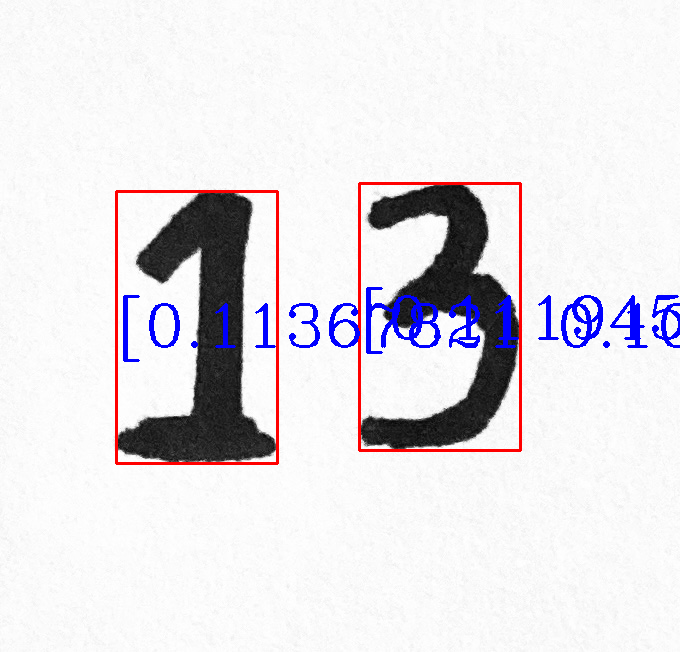

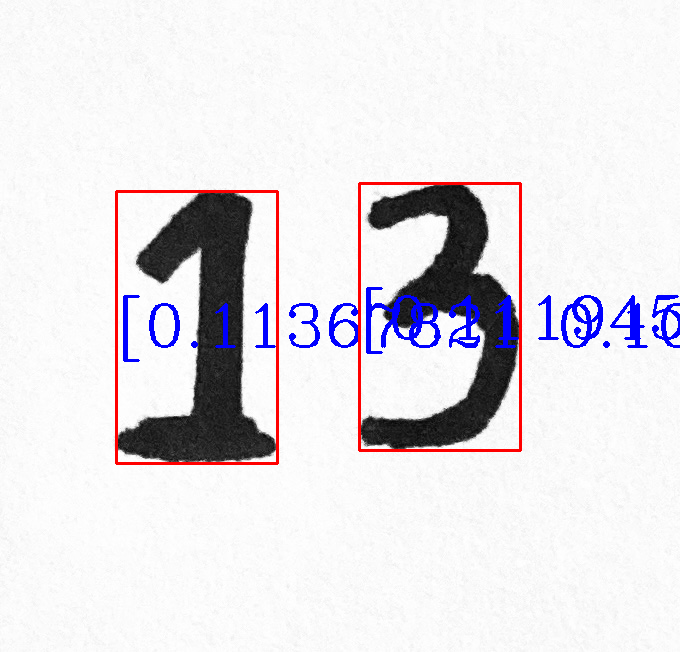

In [ ]:
# loop over the contours
for c in contours:
    # compute the bounding box for the rectangle
    (x, y, w, h) = cv2.boundingRect(c)    

    if w >= 5 and h >= 25:
        roi = blurred[y:y + h, x:x + w]
        ret, roi = cv2.threshold(roi, 127, 255,cv2.THRESH_BINARY_INV)
        roi = makeSquare(roi)
        roi = resize_to_pixel(28, roi)
        cv2_imshow(roi)
        roi = roi / 255.0       
        roi = roi.reshape(1,28,28,1) 

        ## Get Prediction
        res = str(classifier.predict(roi, 1, verbose = 0)[0])
        full_number.append(res)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
        cv2.putText(image, res, (x , y + 155), cv2.FONT_HERSHEY_COMPLEX, 2, (255, 0, 0), 2)
        cv2_imshow(image)
        cv2.waitKey(0) 
        
cv2.destroyAllWindows()

In [ ]:
# print ("The number is: " + ''.join(full_number))
print("The number is:" + ''.join(full_number))

The number is:[0.11367821 0.1068258  0.10135231 0.09714742 0.09803551 0.1013134
 0.08861712 0.10056939 0.10328106 0.08917976][0.11194512 0.10053626 0.10657553 0.09886371 0.09150898 0.10335983
 0.0894881  0.09634775 0.10907018 0.09230448][0.11194512 0.10053626 0.10657553 0.09886371 0.09150898 0.10335983
 0.0894881  0.09634775 0.10907018 0.09230448]
